# Harmonic Spectrum

extracting harmonic spectrum from an audio signal. estimate fundamental frequency f0 at each time step and extract energy at integer multiples of f0(harmonics).

In [10]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import mir_eval.sonify
from IPython.display import Audio

In [11]:
y, sr = librosa.load(librosa.ex('libri2'), duration = 5)
Audio(data = y, rate = sr)

pyin will set f0[n] = np.nan (not a number) whenever voicing[n] == False. will handle this situation later on when resynthesizing the signal.

/home/loki/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/loki/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


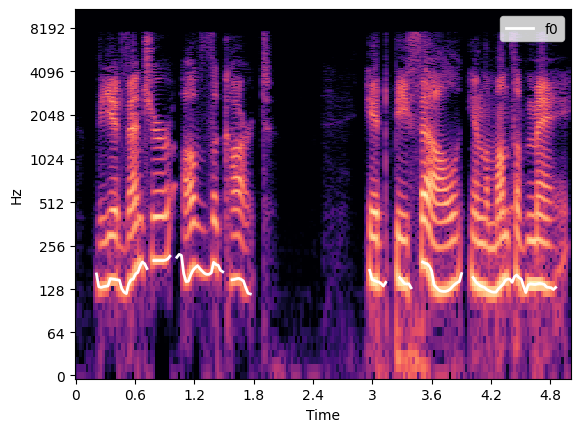

In [12]:
f0, voicing, voicing_probability = librosa.pyin(y = y, sr = sr, fmin = 50, fmax = 300)

S = np.abs(librosa.stft(y))

times = librosa.times_like(S, sr = sr)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax)
ax.plot(times, f0, linewidth = 2, color = 'white', label = 'f0')
ax.legend()

In [13]:
harmonics = np.arange(1, 31)
freq = librosa.fft_frequencies(sr = sr)
harmonic_energy = librosa.f0_harmonics(S, f0 = f0, harmonics = harmonics, freqs = freq)

[Text(0, 0.5, 'Harmonics')]

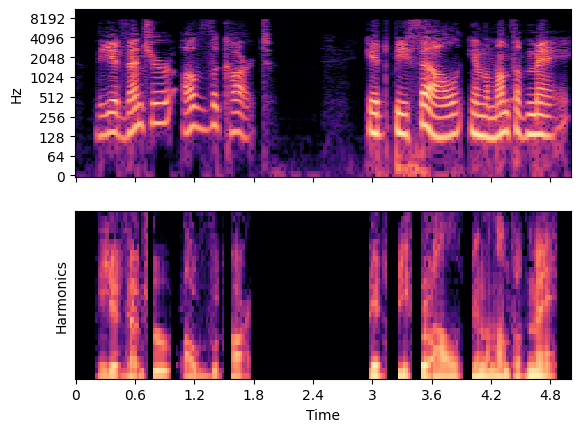

In [14]:
fig, ax = plt.subplots(nrows = 2, sharex = True)

librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time', ax = ax[0])
librosa.display.specshow(librosa.amplitude_to_db(harmonic_energy, ref = np.max), x_axis = 'time', ax = ax[1])

ax[0].label_outer()
ax[1].set(ylabel = 'Harmonics')

In [15]:
# reporoducing the singal by adding the harmonic sin waves to the mixture

f0_synth = np.nan_to_num(f0)

y_out = np.zeros_like(y)

for i, (factor, energy) in enumerate(zip(harmonics, harmonic_energy)):
    y_out = y_out + mir_eval.sonify.pitch_contour(times, f0_synth * factor, amplitudes = energy, fs = sr, length = len(y))

Audio(data = y_out, rate = sr)

In [17]:
# monotonic reproduction

f_mono = 110 * np.ones_like(f0)

y_mono = np.zeros_like(y)

for i, (factor, energy) in enumerate(zip(harmonics, harmonic_energy)):
    y_mono = y_mono + mir_eval.sonify.pitch_contour(times, f_mono * factor, amplitudes = energy, fs = sr, length = len(y))

Audio(data = y_mono, rate = sr)